In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [8]:
#Read dataset
df = pd.read_csv('diabetes2.csv')

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.shape

(768, 9)

In [12]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [19]:
corr=df.corr()

<Axes: >

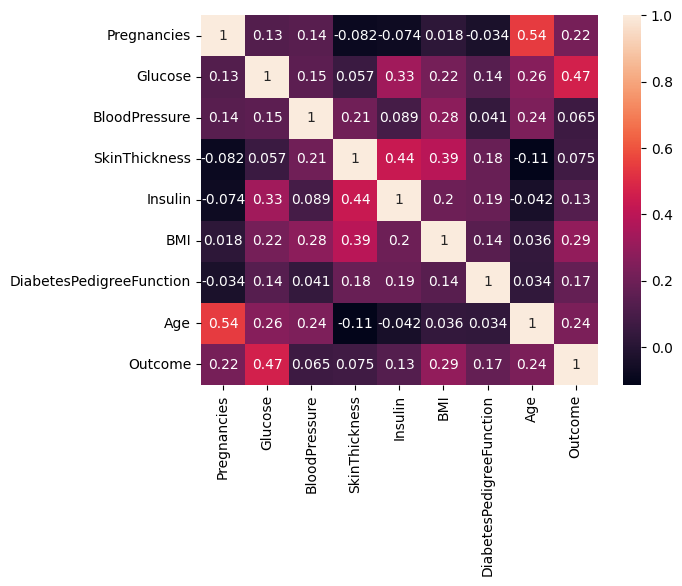

In [21]:
import seaborn as sns  
sns.heatmap(corr,annot=True)

In [24]:
x=df[['Glucose','BMI', 'Age']]
y=df['Outcome']

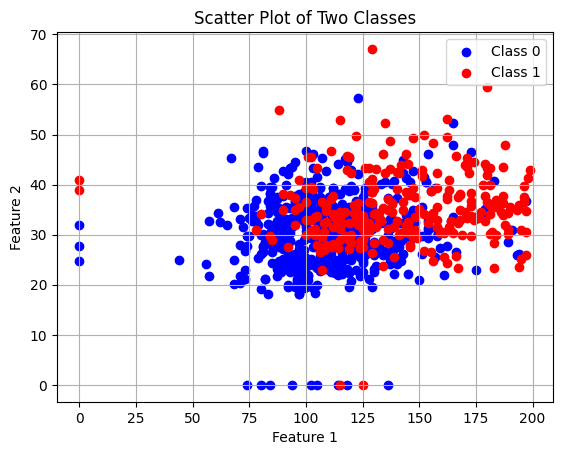

In [34]:
import matplotlib.pyplot as plt

plt.scatter(x[y==0].iloc[:, 0], x[y==0].iloc[:, 1], color='b', label='Class 0')
plt.scatter(x[y==1].iloc[:, 0], x[y==1].iloc[:, 1], color='r', label='Class 1')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Two Classes")
plt.legend()
plt.grid(True)
plt.show()


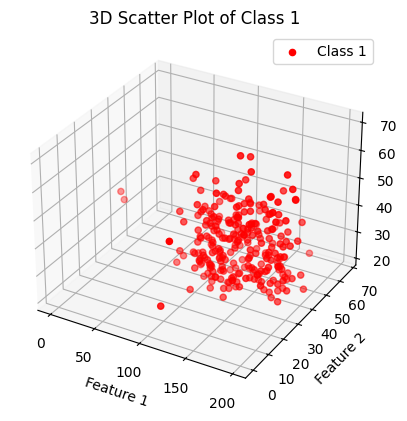

In [35]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    x[y == 1].iloc[:, 0],  # Feature 1
    x[y == 1].iloc[:, 1],  # Feature 2
    x[y == 1].iloc[:, 2],  # Feature 3
    color='r', label='Class 1'
)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Scatter Plot of Class 1')
plt.legend()
plt.show()


In [47]:
theta_c

array([0.25283452, 0.93809329, 0.10189537])

In [46]:
theta_c=np.random.rand(x.shape[1])
theta_c_0=0
iteration =100
m_sample=x.shape[0]

In [52]:
x

,Glucose,BMI,Age
0,148,33.6,50
1,85,26.6,31
2,183,23.3,32
3,89,28.1,21
4,137,43.1,33
...,...,...,...
763,101,32.9,63
764,122,36.8,27
765,121,26.2,30
766,126,30.1,47


In [55]:
z=theta_c_0 + np.dot(x,theta_c.T)
z.shape

(768,)

In [64]:
g_z=1/(1+np.e**(-z))

In [67]:
g_z.min()

0.9999999992040243

In [101]:
np.sum(g_z-y)

499.99999999894453

In [140]:
class LogisticRegression:
    
    def __init__(self, iteration=1000 , l_rate=0.01):
        self.iteration=iteration
        self.l_rate=l_rate
        
    def fit(self, x,y):
        self.losses=[]
        self.theta_c=np.random.rand(x.shape[1])
        self.theta_c_0=0
        self.m_sample=x.shape[0]
        for i in range(self.iteration):
            
            z=self.theta_c_0 + np.dot(x,self.theta_c.T)
            g_z=1/(1+np.e**(-z))
            
            cost=(-y * np.log(g_z)-(1-y)*np.log(1-g_z))/self.m_sample
            self.losses.append(cost)
        
            theta_d0= (1/self.m_sample)*np.sum(g_z-y)
            theta_d1=(1/self.m_sample)*np.dot((g_z-y),x)
            
            
            self.theta_c_0=self.theta_c_0 - self.l_rate * theta_d0
            self.theta_c=  self.theta_c - self.l_rate * theta_d1
        return self
    def draw(self):
        plt.plot(self.losses)
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.title("Loss Curve")
        plt.grid(True)
        plt.show()
    
    def predict(self,x):
        y_pred=z=self.theta_c_0 + np.dot(x,self.theta_c.T)
        z=y_pred
        g_z =  1/(1+np.e**(-z))
        return [1 if i > 0.5 else 0 for i in g_z]

In [141]:
def scale(x):
    x_scaled = x - np.mean(x ,axis=0)
    x_scaled = x_scaled/np.std(x_scaled ,axis=0)
    return x_scaled
    

In [142]:
x_scale=scale(x)

In [159]:
from sklearn.model_selection import train_test_split

x_train , x_test ,y_train ,y_test =train_test_split(x_scale,y,test_size=0.2,random_state=45)

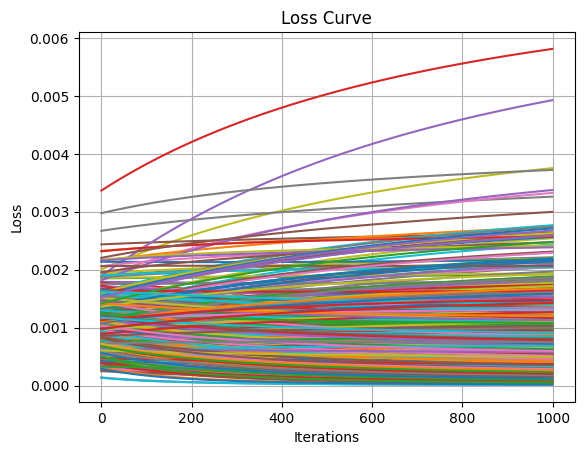

In [160]:
model = LogisticRegression(iteration=1000, l_rate=0.01)
model.fit(x_train, y_train)
model.draw()
# y_pred = model.predict(X_test)

In [161]:
y_pred=model.predict(x_test)

In [162]:
coo=confusion_matrix(y_pred,y_test)
coo

array([[86, 20],
       [18, 30]], dtype=int64)

In [163]:
TP=coo[0][0]
FP=coo[0][1]
FN=coo[1][0]
TN=coo[1][1]

In [164]:
accuracy = (TP+TN)/(TP+FP+FN+TN)
accuracy

0.7532467532467533

In [165]:
precision = (TP)/(TP+FP)
precision

0.8113207547169812

In [166]:
recall = (TP)/(TP+FN)
recall

0.8269230769230769

In [167]:
F_score1=(2*precision*precision)/(precision+precision)
F_score1

0.8113207547169812